In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "21118_lhe_jhgoh"

path = "/users/yewzzang/work/HEPGNN_4top/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_feature.csv"
feature_path = glob.glob(path)
feature_list = [file for file in feature_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_batch.csv"
batch_path = glob.glob(path)
batch_list = [file for file in batch_path if file.endswith(".csv")]





d = train_list
dd = pred_list
ddd = feature_list

ddddd = batch_list


In [3]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

In [4]:
dd

[]

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


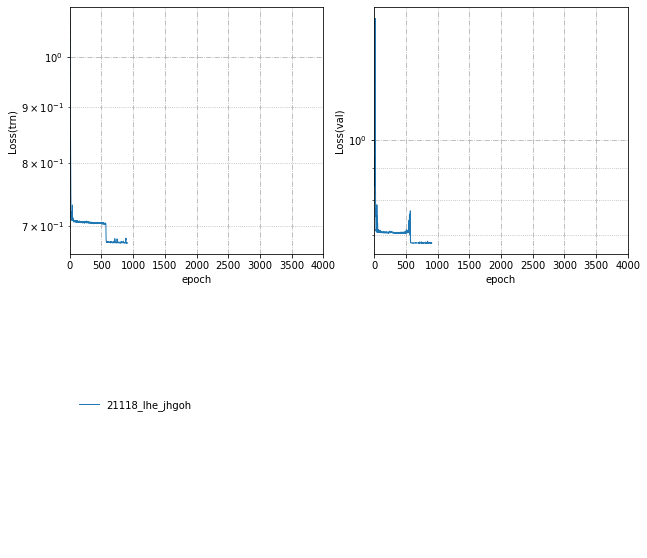

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(trn)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,4000])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])
    
    label = d[i].split('/')[-2].replace('__', ' ')
    if label.split('_')[0] == '210817':
        l =  ax1.plot(df['trn_loss'], linewidth=2)
        ax2.plot(df['val_loss'], linewidth=2)
    else:
        l =  ax1.plot(df['trn_loss'])
        ax2.plot(df['val_loss'])
    
#     label = ddd[i]
    
    lines.append(l[0])
    labels.append(label)
ax3 = plt.subplot(3,1,3)
ax3.legend(lines, labels)
ax3.axis('off')
plt.tight_layout()
plt.show()
plt.close()

In [6]:
# from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(df['prediction'], histtype='step', 
             density=True, bins=50, color='blue',label='pred')        
plt.hist(df['weight'], histtype='step', 
             density=True, bins=50, color='red',label='real') 
plt.legend()

plt.show()

IndexError: list index out of range

<Figure size 720x720 with 0 Axes>

In [ ]:
df['prediction'].max()

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(df['prediction'], histtype='step', 
             density=True, bins=50, color='blue',label='pred')        
# plt.hist(df['weight'], histtype='step', 
#              density=True, bins=50, color='red',label='real') 
plt.legend()

plt.show()

In [ ]:
print(df['prediction'].max(),'max')
print(df['prediction'].min(),'min')
print(np.average(df['prediction']),'pred average')
print(np.average(df['weight']),'real average')

In [ ]:
###### max mass
df3 = pd.read_csv(ddd[0])     ### feature
df4 = pd.read_csv(ddddd[0])   ### batch
df4 = np.array(df4)
df3 = np.array(df3).reshape(-1,4)  ## mass /px/py/pz
#### 각 batch 안에서 최대 max pt의 feature들 뽑기
a = 0
max_mass_features = []
for i in range(len(df4)):
    mass = df3[a:a+df4[i][0]][:,0]

    aaaa = np.where(mass == mass.max())

    
    max_mass_particle = df3[a+aaaa[0]]
 
    max_mass_features.append(max_mass_particle)
    a += df4[i][0]


In [ ]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet mass')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,0], 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,0], histtype='step', 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,0], histtype='step', 
             density=False, bins=np.arange(0,200,step=1), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], ns1/ns2,width=2)
ax3.bar(bins0[1:], ns1/ns0,width=2)
ax4.bar(bins0[1:], ns2/ns0,width=2)
ax1.set_xlim([160,200])
ax2.set_xlim([160,200])
ax3.set_xlim([160,200])
ax4.set_xlim([160,200])


ax1.legend(loc='best')

plt.show()


In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'px')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,1], 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-7,7])
ax2.set_xlim([-7,7])
ax3.set_xlim([-7,7])
ax4.set_xlim([-7,7])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'py')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,2], 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-6,6])
ax2.set_xlim([-6,6])
ax3.set_xlim([-6,6])
ax4.set_xlim([-6,6])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'pz')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_mass_features)[:,:,3], 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_mass_features)[:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_mass_features)[:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=5)
ax3.bar(bins0[1:], (ns1/ns0),width=5)
ax4.bar(bins0[1:], (ns2/ns0),width=5)
ax1.set_xlim([-10,600])
ax2.set_xlim([-10,600])
ax3.set_xlim([-10,600])
ax4.set_xlim([-10,600])



ax1.legend(loc='best')

plt.show()